In [2]:
import pandas as pd

years = ['2001','2003','2005','2007','2009','2011','2013','2015','2017','2019']
states = ['Delhi', 'Haryana', 'Tamil Nadu', 'Gujarat', 'Kerala', 'Uttar Pradesh', 'West Bengal', 'Maharashtra']
df = pd.read_csv("Total Tree Cover.csv")
l = []
for state in states:
    for year in years:
        l.append(df[year].loc[df['States']==state].item())
print(l)

[151, 268, 283, 292, 296, 290, 294, 299.77, 305.41, 324.44, 3280, 2932, 3152, 3081, 2964, 2912, 2869, 2939.0, 3003.0, 3167.0, 27536, 27634, 28665, 28632, 27958, 27361, 27910, 30850.0, 30952.0, 31194.0, 19188, 25532, 22336, 22625, 23173, 22783, 23073, 22574.0, 22781.0, 21769.0, 16706, 17480, 18227, 20040, 19251, 18332, 18741, 22190.0, 23280.0, 24080.0, 21291, 21833, 22330, 22133, 21610, 21500, 21022, 21505.0, 22121.0, 22148.0, 13957, 14074, 14682, 15357, 15126, 14678, 14557, 18916.0, 18983.0, 18908.0, 55751, 56185, 56454, 59872, 58223, 55944, 56618, 60186.0, 60513.0, 61584.0]


In [3]:
aqis = [143.56,115.98,133.40,117.93,114.34,70.47,387.27,200.54]
tree = [52234,52856,21500,23710,60186,30850,18950,302]
states = ["Andhra Pradesh","Orissa","Uttar Pradesh","Rajasthan","Tamil Nadu","Maharashtra","West Bengal","Delhi"]
ga = pd.read_csv("forest_cover.csv")
g = []
for state in states:
    a = ga["Geographical Area_1-13"].loc[ga['State/UT']==state].item()
    g.append(int(a.replace(',','')))
print(g)

[275069, 155707, 240928, 342239, 130058, 307713, 88752, 1483]


In [4]:
ratio = []
for i in range(len(g)):
    ratio.append((tree[i]/g[i])*100)
print(ratio)

[18.989417200775076, 33.94580847360748, 8.9238278655864, 6.927907105852928, 46.276276738070706, 10.025575780028793, 21.351631512529295, 20.364126770060686]


In [5]:
# Assuming 50000 trees per km^2
ap = pd.read_csv("APTI_Values.csv")
aptis = []
for state in states:
    apti = ap['APTI'].loc[ap['Area Found ']==state].values
    aptis.append(sum(apti)/len(apti))
print(aptis)

[13.454782608695648, 19.97, 11.469999999999999, 5.183189, 5.7780000000000005, 21.933333333333337, 47.59, 12.723809523809523]


In [7]:
values = []
for i in range(len(tree)):
    values.append((tree[i]*50000*aptis[i])/g[i])
print(values)

[127749.24015112726, 338948.8976089707, 51178.152809137995, 17954.325952039366, 133692.16349628626, 109947.14772098245, 508062.07184063457, 129554.63507048131]


In [8]:
#Correlation in mean aqi and mean aptis
from scipy.stats import pearsonr
corr1,_ = pearsonr(aqis,aptis)
print(corr1)

0.7901765228495925


In [9]:
corr2,_ = pearsonr(aqis,values)
print(corr2)

0.7514628614677439


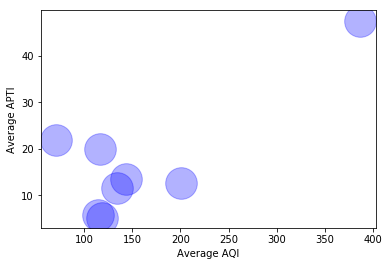

In [19]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(aqis,aptis, s = 1000,color = 'blue',alpha = 0.3)
ax.set(xlabel='Average AQI' ,ylabel='Average APTI')
plt.show()